## [ 산점도 그래프 ]
- 두개의 컬럼(변수)의 관계를 시각화해서 표현
- 연속형(수치형)데이터에 사용함

In [1]:
# [1] 모듈 로딩
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# [2] 데이터 준비
F_DATA=r'C:\Users\KDP15\Desktop\KDT6\EX_PANDAS06\DATA\auto_mpg.csv'

In [3]:
# [3] csv => DataFrame으로 저장
dataDF=pd.read_csv(F_DATA)

In [4]:
# - 컬럼별 타입 확인
dataDF.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

In [7]:
# [4] 컬럼별로 이상한 값 즉, 이상치 체크 및 시각화
# 
dataDF.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


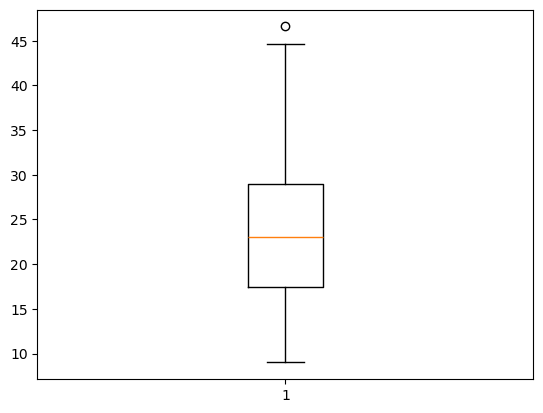

In [14]:
# - 박스 그래프로 시각화
retDict=plt.boxplot(dataDF['mpg'], whis=1.5)
plt.show()

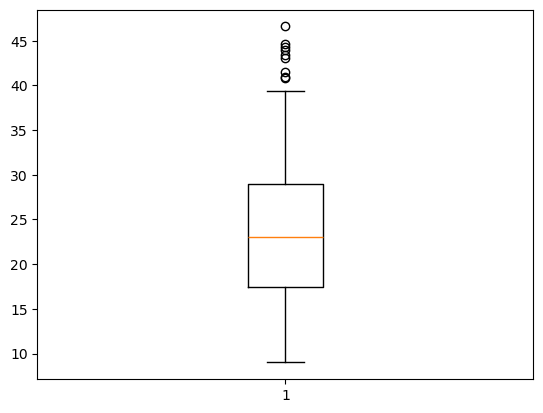

In [18]:
# - 박스 그래프로 시각화
retDict=plt.boxplot(dataDF['mpg'], whis=1)
plt.show()

In [19]:
# 박스 그래프에서 받은 결과 확인
for k,v in retDict.items():
    print(k)
    for _ in v:
        print(_.get_data())

whiskers
(array([1, 1]), array([17.5,  9. ]))
(array([1, 1]), array([29. , 39.4]))
caps
(array([0.9625, 1.0375]), array([9., 9.]))
(array([0.9625, 1.0375]), array([39.4, 39.4]))
boxes
(array([0.925, 1.075, 1.075, 0.925, 0.925]), array([17.5, 17.5, 29. , 29. , 17.5]))
medians
(array([0.925, 1.075]), array([23., 23.]))
fliers
(array([1., 1., 1., 1., 1., 1., 1., 1., 1.]), array([43.1, 41.5, 46.6, 40.8, 44.3, 43.4, 44.6, 40.9, 44. ]))
means


In [38]:
# 하위/상위 이상치 값 추출
outlier=retDict['caps']
low_outlier=outlier[0].get_data()[1].tolist()[0]
up_outlier=outlier[1].get_data()[1].tolist()[0]

In [40]:
dataDF[dataDF['mpg']<low_outlier]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name


In [41]:
dataDF[dataDF['mpg']>up_outlier]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
244,43.1,4,90.0,48,1985,21.5,78,2,volkswagen rabbit custom diesel
309,41.5,4,98.0,76,2144,14.7,80,2,vw rabbit
322,46.6,4,86.0,65,2110,17.9,80,3,mazda glc
324,40.8,4,85.0,65,2110,19.2,80,3,datsun 210
325,44.3,4,90.0,48,2085,21.7,80,2,vw rabbit c (diesel)
326,43.4,4,90.0,48,2335,23.7,80,2,vw dasher (diesel)
329,44.6,4,91.0,67,1850,13.8,80,3,honda civic 1500 gl
330,40.9,4,85.0,?,1835,17.3,80,2,renault lecar deluxe
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
